In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import copy
import matplotlib.colors
from sklearn.svm import SVC

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve

In [2]:
s01_umap = np.load("../Embeddings/s01_umap.npy")
s01_tsne = np.load("../Embeddings/s01_tsne.npy")
s01_pca = np.load("../Embeddings/s01_pca.npy")
s01_2layer = np.load("../Embeddings/s01_2layer.npy")
s01_6layer = np.load("../Embeddings/s01_6layer.npy")
s01_vae = np.load("../Embeddings/s01_vae.npy")
PopData = pd.read_csv("../SamusikData/population_assignments01.csv")
Assignments = np.array(PopData.Population)

In [3]:
s01_labels = PopData["Population"].to_numpy()
non_zero = np.where(s01_labels > 0)
s01_pca = s01_pca[non_zero]
s01_umap = s01_umap[non_zero]
s01_tsne = s01_tsne[non_zero]
s01_2layer = s01_2layer[non_zero]
s01_6layer = s01_6layer[non_zero]
s01_vae = s01_vae[non_zero]
y = Assignments[non_zero]

In [4]:
np.random.seed(1)

In [5]:
def run_crossval(X, y):
    cv = StratifiedKFold(n_splits=5)  

    accs = []
    mean_fpr = np.linspace(0, 1, 100)

    classifier = SVC(kernel='rbf', random_state = 1)
    for i, (train, test) in enumerate(cv.split(X, y)):
        X_train = np.array(X[train])
        X_test = np.array(X[test])
        y_train = np.array(y[train])
        y_test = np.array(y[test])

        classifier.fit(X_train, y_train)
        acc = metrics.accuracy_score(y_test, classifier.predict(X_test))
        print("Fold " + str(i+1) + ": " + str(acc))
        accs.append(acc)
    print("Mean Accuracy: " + str(np.mean(accs)))
    print("Accuracy SD: " + str(np.std(accs)))
    return np.mean(accs), np.std(accs)

### PCA Accuracy

In [6]:
X_pca = s01_pca[:,0:2]

In [7]:
mean_accs_pca, std_accs_pca = run_crossval(X_pca, np.array(y))

C:\Users\robby\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fold 1: 0.6586741889985895
Fold 2: 0.6540667606958157
Fold 3: 0.6541607898448519
Fold 4: 0.6498025202181681
Fold 5: 0.6545984577769419
Mean Accuracy: 0.6542605435068733
Accuracy SD: 0.002811260457305554


### UMAP Accuracy

In [8]:
X_umap = s01_umap[:,0:2]

In [9]:
mean_accs_umap, std_accs_umap = run_crossval(X_umap, np.array(y))

C:\Users\robby\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fold 1: 0.9498824635637048
Fold 2: 0.9502585801598495
Fold 3: 0.9473436765397273
Fold 4: 0.9466804589053978
Fold 5: 0.9489373706977619
Mean Accuracy: 0.9486205099732883
Accuracy SD: 0.0013978771964848781


### tSNE Accuracy

In [10]:
X_tsne = s01_tsne[:,0:2]

In [11]:
mean_accs_tsne, std_accs_tsne = run_crossval(X_tsne, np.array(y))

C:\Users\robby\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fold 1: 0.94950634696756
Fold 2: 0.948095909732017
Fold 3: 0.944428772919605
Fold 4: 0.9447056610870792
Fold 5: 0.9480910287756253
Mean Accuracy: 0.9469655438963773
Accuracy SD: 0.0020269386119309996


### 2 Layer AE Accuracy

In [12]:
X_2layer = s01_2layer[:,0:2]

In [13]:
mean_accs_2layer, std_accs_2layer = run_crossval(X_2layer, np.array(y))

C:\Users\robby\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fold 1: 0.5998119417019276
Fold 2: 0.6306535025858016
Fold 3: 0.6348848142924306
Fold 4: 0.6322174158359978
Fold 5: 0.6253526424675568
Mean Accuracy: 0.6245840633767429
Accuracy SD: 0.012770750624747161


### 6 Layer AE Accuracy

In [14]:
X_6layer = s01_6layer[:,0:2]

In [15]:
mean_accs_6layer, std_accs_6layer = run_crossval(X_6layer, np.array(y))

C:\Users\robby\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fold 1: 0.8608368594264222
Fold 2: 0.8628114715561824
Fold 3: 0.860272684532205
Fold 4: 0.8584728230205003
Fold 5: 0.862516456648486
Mean Accuracy: 0.8609820590367591
Accuracy SD: 0.0015825098228408954


### VAE Accuracy

In [16]:
X_vae = s01_vae[:,0:2]

In [17]:
mean_accs_vae, std_accs_vae = run_crossval(X_vae, np.array(y))

C:\Users\robby\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Fold 1: 0.9121767748001881
Fold 2: 0.9106723084156089
Fold 3: 0.9093559003291021
Fold 4: 0.9072785405303743
Fold 5: 0.9073725785217228
Mean Accuracy: 0.9093712205193991
Accuracy SD: 0.0018941002410478823


### Figure Generation

In [18]:
# Create lists for the plot
Methods = ['PCA', 'UMAP', 'tSNE', '2 Layer AE', '6 Layer AE', 'VAE']
x_pos = np.arange(len(Methods))
Means = [mean_accs_pca, mean_accs_umap, mean_accs_tsne, mean_accs_2layer, mean_accs_6layer, mean_accs_vae]
Errors = [std_accs_pca, std_accs_umap, std_accs_tsne, std_accs_2layer, std_accs_6layer, std_accs_vae]

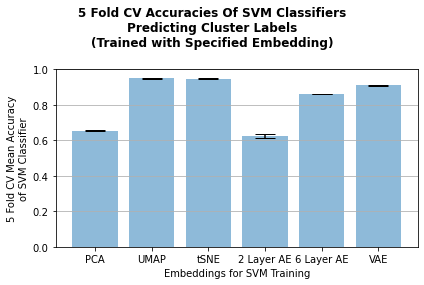

In [19]:
# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, Means, yerr=Errors, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('5 Fold CV Mean Accuracy\nof SVM Classifier')
ax.set_xlabel('Embeddings for SVM Training')
ax.set_xticks(x_pos)
ax.set_xticklabels(Methods)
plt.suptitle('5 Fold CV Accuracies Of SVM Classifiers\nPredicting Cluster Labels\n(Trained with Specified Embedding)', fontweight = 'bold')
ax.yaxis.grid(True)
ax.set_ylim([0.0, 1.0])
# Save the figure and show
plt.tight_layout()
plt.savefig('../Figures/SVMClassiferAccuracies.png')
plt.show()